# **Machine Learning Study Case - Animal Classification**

Computer vision is a branch of Artificial Intelligence (AI) that deals with image data. One example of computer vision implementation is animal image classification. The model will be able to distinguish different types of animals based on certain features and patterns that are unique to an animal.

This project aims to create a machine learning model to classify 4 animal classes namely cat, dog, deer, and horse. The model was created with the help of transfer learning through MobileNet and then a few dense layers were also added to further train the model with the dataset.

**By Giselle Halim**

# 1. Importing packages

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/ofa-ai-mastery-computer-vision'

# 2. Visualising data

In [ ]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,cat,700
1,horse,600
2,deer,600
3,dog,900


<Axes: xlabel='Name of class', ylabel='Number of samples'>

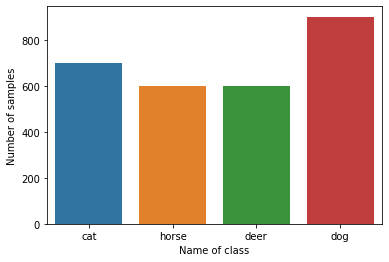

In [ ]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

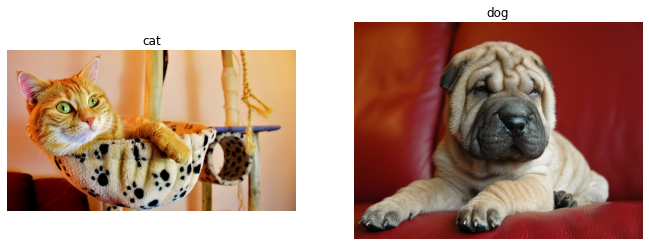

In [ ]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(2):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,5)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

# 3. Preparing the data

In [ ]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

In [ ]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


# 4. Building the model

In [ ]:
# Using InceptionV3, along with 2 extra dense layers and the output layer

mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005, momentum = 0.9),
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 4)                

# 5. Training and evaluating

In [ ]:
# model.load_weights(checkpoint_filepath)
# run model.load_weights if google colab runtime is restarted

history = model.fit(train_ds , batch_size=32,  validation_data = val_ds , epochs = 25, callbacks=[model_checkpoint_callback])

Epoch 1/25
70/70 [==============================] - 61s 762ms/step - loss: 0.8153 - accuracy: 0.7098 - val_loss: 0.4123 - val_accuracy: 0.9036
Epoch 2/25
70/70 [==============================] - 54s 771ms/step - loss: 0.3302 - accuracy: 0.9085 - val_loss: 0.2686 - val_accuracy: 0.9196
Epoch 3/25
70/70 [==============================] - 55s 782ms/step - loss: 0.2202 - accuracy: 0.9326 - val_loss: 0.2132 - val_accuracy: 0.9411
Epoch 4/25
70/70 [==============================] - 54s 774ms/step - loss: 0.1633 - accuracy: 0.9513 - val_loss: 0.1797 - val_accuracy: 0.9429
Epoch 5/25
70/70 [==============================] - 53s 763ms/step - loss: 0.1339 - accuracy: 0.9638 - val_loss: 0.1795 - val_accuracy: 0.9357
Epoch 6/25
70/70 [==============================] - 53s 758ms/step - loss: 0.1163 - accuracy: 0.9638 - val_loss: 0.1573 - val_accuracy: 0.9482
Epoch 7/25
70/70 [==============================] - 54s 776ms/step - loss: 0.1034 - accuracy: 0.9661 - val_loss: 0.1703 - val_accuracy: 0.9446

18/18 [==============================] - 10s 540ms/step - loss: 0.1231 - accuracy: 0.9625


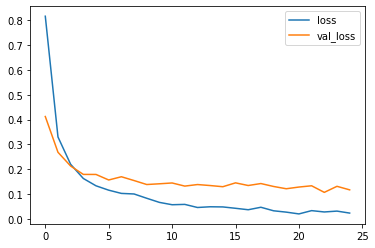

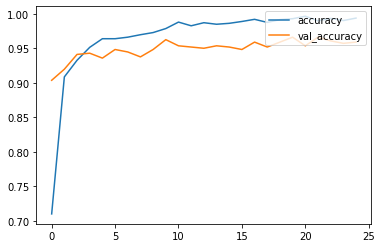

In [ ]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# 6. Preparing for submission

In [ ]:
sub_csv ='/content/drive/MyDrive/ofa-ai-mastery-computer-vision/Sample_submission.csv'
path_test = '/content/drive/MyDrive/ofa-ai-mastery-computer-vision/test/test'

In [ ]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
#Each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


#Making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()

    labels.append(label_id.index(max(label_id)))


1/1 [==============================] - 0s 32ms/step


In [ ]:
#Replace the previous empty columns with the new predictions

df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


In [ ]:
#Saving file
df_sub.to_csv('submission_file.csv',index=False)